## 단계변수 사용 O, EDA 구분

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pygam import LinearGAM, s, f, l
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import optuna

In [2]:
df1 = pd.read_csv('0918_eda_one_hot.csv')
df2 = df1.copy()
df2 = df2.drop(columns = ['cluster_1','cluster_2','cluster_3'])

In [3]:
#정규화를 위한 train-test 분리
split_ratio = 0.8
split_index = int(len(df1) * split_ratio)

X = df2.iloc[:, 2:]
y = df2.iloc[:, 1]

X_train = df2.iloc[:split_index, 2:]  # 처음 80%의 행을 훈련 데이터로 사용 
y_train = df2.iloc[:split_index, 1]   # 처음 80%의 행을 훈련 데이터의 타겟 값으로 사용 
X_test = df2.iloc[split_index:, 2:]   # 나머지 20%의 행을 테스트 데이터로 사용 
y_test = df2.iloc[split_index:, 1] # 나머지 20%의 행을 테스트 데이터로 사용

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20851, 7) (5213, 7) (20851,) (5213,)


In [4]:
#정규화 진행
scaler_x = StandardScaler()
scaler_x.fit_transform(X_train)
X = scaler_x.transform(X)

scaler_y = StandardScaler()
scaler_y.fit_transform(y_train.values.reshape(-1,1))
y = scaler_y.transform(y.values.reshape(-1,1))

X_df = pd.DataFrame(X, columns=['PFBS_NTRO_CBDX_CTRN', 'SPL_TPRT_1','HTNG_TPRT_1', 'SPL_TPRT_2', 'AVE_INNER_HMDT_1_2','SKLT_OPDR_RATE_1_RIGHT', 'GDD'])
y_df = pd.DataFrame(y, columns=['FRST_TREE_CNT'])
df = pd.concat([y_df, X_df], axis=1) #다시 데이터프레임으로 합치기

#날짜열 추가 및 순서 앞으로 옮기기
df['STRG_DT'] = df1['STRG_DT']
df = df[['STRG_DT'] + [col for col in df if col != 'STRG_DT']]

In [5]:
df[['cluster_1','cluster_2','cluster_3']] = df1[['cluster_1','cluster_2','cluster_3']]

In [6]:
df #최종 정규화 완료, 원핫인코딩된 변수 추가완료된 데이터프레임

,STRG_DT,FRST_TREE_CNT,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,cluster_3
0,2022-01-01 0:00,-0.102251,-0.043934,0.858048,-0.293285,-3.266703,0.190960,-0.672832,-0.075804,1,0,0
1,2022-01-01 0:10,-0.102251,-0.010636,1.737274,-0.293285,-3.220612,0.190960,-0.672832,-0.075804,1,0,0
2,2022-01-01 0:20,-0.102251,0.089257,1.417556,-0.293285,-3.189884,0.065110,-0.672832,-0.075804,1,0,0
3,2022-01-01 0:30,-0.102251,0.067058,1.257696,-0.293285,-3.205248,0.149010,-0.672832,-0.075804,1,0,0
4,2022-01-01 0:40,-0.102251,0.078158,1.231053,-0.293285,-3.251339,0.407701,-0.672832,-0.075804,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,2022-06-30 23:10,-2.324533,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,0,0,1
26060,2022-06-30 23:20,-2.324533,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,0,0,1
26061,2022-06-30 23:30,-2.324533,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,0,0,1
26062,2022-06-30 23:40,-2.324533,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,0,0,1


In [7]:
#다시 train-test 분리
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

X = df.iloc[:, 2:]
y = df.iloc[:, 1]

X_train = df.iloc[:split_index, 2:]  # 처음 80%의 행을 훈련 데이터로 사용 
y_train = df.iloc[:split_index, 1]   # 처음 80%의 행을 훈련 데이터의 타겟 값으로 사용 
X_test = df.iloc[split_index:, 2:]   # 나머지 20%의 행을 테스트 데이터로 사용 
y_test = df.iloc[split_index:, 1] # 나머지 20%의 행을 테스트 데이터로 사용

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20851, 10) (5213, 10) (20851,) (5213,)


### Optuna 사용해서 하이퍼파라미터 찾기

In [8]:
# Objective 함수 정의 (하이퍼파라미터 최적화)
def objective(trial):
    X_train = df.iloc[:split_index, 2:]  # 처음 80%의 행을 훈련 데이터로 사용 
    y_train = df.iloc[:split_index, 1]   # 처음 80%의 행을 훈련 데이터의 타겟 값으로 사용 
    X_test = df.iloc[split_index:, 2:]   # 나머지 20%의 행을 테스트 데이터로 사용 
    y_test = df.iloc[split_index:, 1]    # 나머지 20%의 행을 테스트 데이터로 사용

    i = trial.suggest_int("n_splines", 4, 10)
    lam = trial.suggest_float("lam", 1e-5, 10, log=True)
    
    # K-폴드 교차 검증을 위한 루프
    mse_scores = []
    kf = KFold(n_splits = 10, shuffle=False)  # 10개 폴드를 사용하도록 설정 (shuffle=True로 설정)
    
    for train_idx, valid_idx in kf.split(X_train):  # 정수 인덱스를 선택
        X_train_fold, X_valid_fold = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_train_fold, y_valid_fold = y_train.iloc[train_idx], y_train.iloc[valid_idx]
    
        # LinearGAM 모델 
        gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + f(7) + f(8) + f(9),  n_splines=[i] * 7 + [2] * 3, lam = lam).fit(X_train_fold, y_train_fold)
        
        # 모델로 예측
        y_pred = gam.predict(X_valid_fold)
    
        # 검증 세트에서 평가 (예: 평균 제곱 오차를 최소화하려고 함)
        mse = mean_squared_error(y_valid_fold, y_pred)
        mse_scores.append(mse)
    
    # K-폴드 검증 결과의 평균을 반환
    return np.mean(mse_scores)

# Study 객체 생성 및 최적화 실행
study = optuna.create_study(direction="minimize")  # 목표는 MSE를 최소화
study.optimize(objective, n_trials=50)

# 최적 하이퍼파라미터 얻기
best_params = study.best_params

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", best_params)


[I 2023-09-26 17:32:09,870] A new study created in memory with name: no-name-b70beac5-d2fd-4b1c-a222-46abd87cf163
[I 2023-09-26 17:32:15,335] Trial 0 finished with value: 1.1618715581540777 and parameters: {'n_splines': 5, 'lam': 0.396640303014114}. Best is trial 0 with value: 1.1618715581540777.
[I 2023-09-26 17:32:20,406] Trial 1 finished with value: 1.1292056087396531 and parameters: {'n_splines': 5, 'lam': 0.016217102604799225}. Best is trial 1 with value: 1.1292056087396531.
[I 2023-09-26 17:32:27,488] Trial 2 finished with value: 1.0415653137471907 and parameters: {'n_splines': 8, 'lam': 1.64629419944219}. Best is trial 2 with value: 1.0415653137471907.
[I 2023-09-26 17:32:37,122] Trial 3 finished with value: 0.9879140329414853 and parameters: {'n_splines': 9, 'lam': 0.037784111588525474}. Best is trial 3 with value: 0.9879140329414853.
[I 2023-09-26 17:32:47,617] Trial 4 finished with value: 1.1495242526132035 and parameters: {'n_splines': 10, 'lam': 0.03680236381962552}. Best i

[I 2023-09-26 17:37:33,742] Trial 43 finished with value: 0.9180740302066444 and parameters: {'n_splines': 8, 'lam': 0.008902749506002039}. Best is trial 30 with value: 0.9171663134346678.
[I 2023-09-26 17:37:41,913] Trial 44 finished with value: 0.9913255167472652 and parameters: {'n_splines': 9, 'lam': 0.01604807299706763}. Best is trial 30 with value: 0.9171663134346678.
[I 2023-09-26 17:37:48,008] Trial 45 finished with value: 1.0189833804731898 and parameters: {'n_splines': 7, 'lam': 0.0470703036402216}. Best is trial 30 with value: 0.9171663134346678.
[I 2023-09-26 17:37:55,576] Trial 46 finished with value: 0.9175689612175166 and parameters: {'n_splines': 8, 'lam': 0.010604833996783112}. Best is trial 30 with value: 0.9171663134346678.
[I 2023-09-26 17:38:04,712] Trial 47 finished with value: 0.9877953709786021 and parameters: {'n_splines': 9, 'lam': 0.11623079532127792}. Best is trial 30 with value: 0.9171663134346678.
[I 2023-09-26 17:38:11,235] Trial 48 finished with value: 1

최적 하이퍼파라미터: {'n_splines': 8, 'lam': 0.016227794238328777}


In [9]:
gam_1 = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + f(7) + f(8) + f(9),  n_splines=[8] * 7 + [2] * 3, lam = 0.016227794238328777).fit(X_train, y_train)
gam_1.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     49.6475
Link Function:                     IdentityLink Log Likelihood:                                -34558.0362
Number of Samples:                        20851 AIC:                                            69217.3674
                                                AICc:                                            69217.619
                                                GCV:                                                0.2236
                                                Scale:                                              0.2226
                                                Pseudo R-Squared:                                   0.7779
Feature Function                  Lam

C:\Users\80700\AppData\Local\Temp/ipykernel_23256/2020464830.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_1.summary()


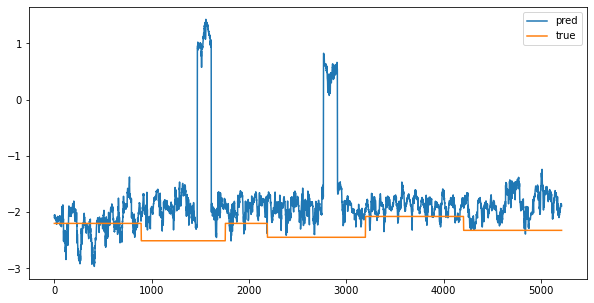

In [10]:
y_pred = gam_1.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(np.array(y_pred),label = "pred")
plt.plot(np.array(y_test),label = "true")
plt.legend()
plt.show()

In [11]:
# 정규화된 데이터를 역으로 변환합니다.
scaler = StandardScaler()
scaled_data = df1.iloc[:split_index, 1].values.reshape(-1, 1)  # 1D 데이터를 2D로 변환
scaler.fit(scaled_data)

# 이미 정규화된 y_pred 값을 역으로 변환합니다.
y_pred_origin = scaler.inverse_transform(y_pred)
y_test_origin = scaler.inverse_transform(y_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test_origin, y_pred_origin))

print("RMSE:", rmse)

RMSE: 1.7934274470558635


In [41]:
def daily_mean(y_pred, y_test):
    #예측값과 test 값을 일별로 평균내기
    df = pd.read_csv('0916 착과수 최종.csv')
    new_df = pd.DataFrame()
    
    split_ratio = 0.8
    split_index = int(len(df) * split_ratio)

    new_df['STRG_DT'] = df.iloc[split_index:, :]['STRG_DT']
    new_df['y_test'] = y_test
    new_df['y_pred'] = y_pred

    new_df['STRG_DT'] = pd.to_datetime(new_df['STRG_DT'])


    # 'STRG_DT' 열을 인덱스로 설정
    new_df.set_index('STRG_DT', inplace=True)

    # 날짜별로 그룹화하고 평균을 계산
    daily_mean = new_df.groupby(new_df.index.date).mean()


    #역정규화
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaled_data = df.iloc[:split_index, 1].values.reshape(-1, 1)  # 1D 데이터를 2D로 변환
    scaler.fit(scaled_data)

    # 이미 정규화된 y_pred 값을 역으로 변환합니다.
    daily_mean['y_pred'] = scaler.inverse_transform(daily_mean['y_pred'])
    daily_mean['y_test'] = scaler.inverse_transform(daily_mean['y_test'])

    #오차 계산
    daily_mean['error'] = daily_mean['y_test'] - daily_mean['y_pred']

    #그래프 계산
    plt.figure(figsize=(10,5))
    plt.plot(np.array(daily_mean['y_pred']),label = "pred")
    plt.plot(np.array(daily_mean['y_test']),label = "true")
    plt.legend()
    plt.show()


    #score 계산
    from sklearn.metrics import mean_squared_error, r2_score

    # RMSE 계산
    rmse = np.sqrt(mean_squared_error(daily_mean['y_test'], daily_mean['y_pred']))

    # R^2 계산
    r_squared = r2_score(daily_mean['y_test'], daily_mean['y_pred'])

    # RMSE와 R^2 값을 리스트로 반환
    score = [rmse, r_squared]
    
    return daily_mean, score

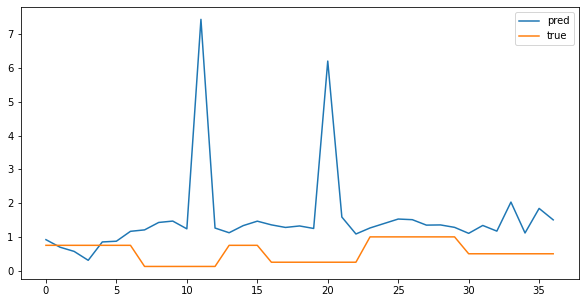

In [42]:
daily, score = daily_mean(y_pred, y_test)

In [43]:
daily

,y_test,y_pred,error
2022-05-25,0.750,0.917645,-0.167645
2022-05-26,0.750,0.694643,0.055357
2022-05-27,0.750,0.570354,0.179646
2022-05-28,0.750,0.306622,0.443378
2022-05-29,0.750,0.850077,-0.100077
2022-05-30,0.750,0.871632,-0.121632
2022-05-31,0.750,1.164579,-0.414579
2022-06-01,0.125,1.206947,-1.081947
2022-06-02,0.125,1.426567,-1.301567
2022-06-03,0.125,1.467574,-1.342574


In [44]:
score

[1.7444696189247288, -30.734200810093228]

### Partial dependance plot

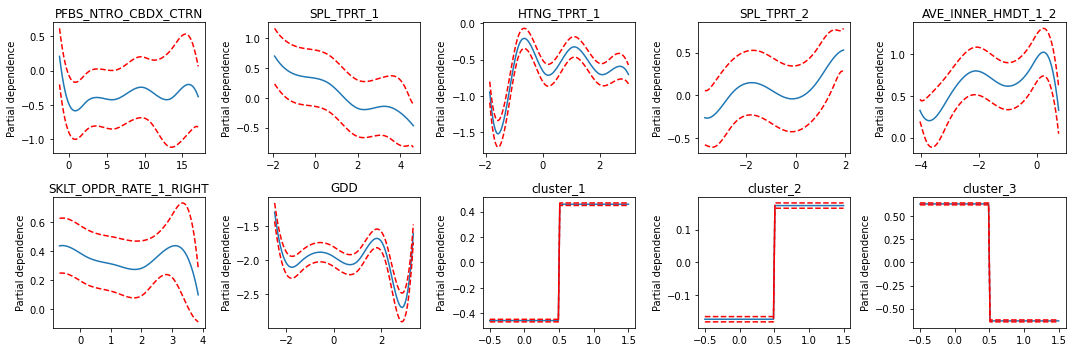

In [30]:
fig, axs = plt.subplots(2, 5, figsize=(15, 5))  

# 각 서브플롯에 원하는 타이틀 설정
feature_names = ['PFBS_NTRO_CBDX_CTRN', 'SPL_TPRT_1', 'HTNG_TPRT_1', 'SPL_TPRT_2', 
                 'AVE_INNER_HMDT_1_2', 'SKLT_OPDR_RATE_1_RIGHT', 'GDD', 'cluster_1', 'cluster_2', 'cluster_3']

for i, ax in enumerate(axs.ravel()): 
    XX = gam_1.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam_1.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam_1.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylabel('Partial dependence')
    ax.set_title(f'{feature_names[i]}')  # 원하는 타이틀로 설정


plt.tight_layout()
plt.show()

### Gridsearch로 하이퍼파라미터 찾기

In [32]:
for i in range(4, 11):
    gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + f(7) + f(8) + f(9),  n_splines=[i] * 7 + [2] * 3).fit(X_train, y_train)
    gam.gridsearch(X_train, y_train)
    ss = gam.summary()
    print(ss) #AIC, GCV 등 종합적으로 고려
    globals()[f'gam_{i-2}'] = gam


100% (11 of 11) |########################| Elapsed Time: 0:00:05 Time:  0:00:05
C:\Users\80700\AppData\Local\Temp/ipykernel_25708/1477484346.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ss = gam.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     23.8433
Link Function:                     IdentityLink Log Likelihood:                                -30614.2283
Number of Samples:                        20851 AIC:                                            61278.1432
                                                AICc:                                           61278.2048
                                                GCV:                                                0.2678
                                                Scale:                                              0.2672
                                                Pseudo R-Squared:                                   0.7331
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:05 Time:  0:00:05
C:\Users\80700\AppData\Local\Temp/ipykernel_25708/1477484346.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ss = gam.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     30.8992
Link Function:                     IdentityLink Log Likelihood:                                -31177.5745
Number of Samples:                        20851 AIC:                                            62418.9475
                                                AICc:                                           62419.0483
                                                GCV:                                                0.2598
                                                Scale:                                              0.2591
                                                Pseudo R-Squared:                                   0.7413
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:06 Time:  0:00:06
C:\Users\80700\AppData\Local\Temp/ipykernel_25708/1477484346.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ss = gam.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     37.8156
Link Function:                     IdentityLink Log Likelihood:                                -32535.8254
Number of Samples:                        20851 AIC:                                            65149.2822
                                                AICc:                                           65149.4307
                                                GCV:                                                0.2433
                                                Scale:                                              0.2425
                                                Pseudo R-Squared:                                    0.758
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:08 Time:  0:00:08
C:\Users\80700\AppData\Local\Temp/ipykernel_25708/1477484346.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ss = gam.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     44.2069
Link Function:                     IdentityLink Log Likelihood:                                -33271.8026
Number of Samples:                        20851 AIC:                                             66634.019
                                                AICc:                                           66634.2198
                                                GCV:                                                0.2355
                                                Scale:                                              0.2346
                                                Pseudo R-Squared:                                   0.7659
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:08 Time:  0:00:08
C:\Users\80700\AppData\Local\Temp/ipykernel_25708/1477484346.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ss = gam.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     50.9423
Link Function:                     IdentityLink Log Likelihood:                                -34558.9943
Number of Samples:                        20851 AIC:                                            69221.8732
                                                AICc:                                           69222.1376
                                                GCV:                                                0.2236
                                                Scale:                                              0.2226
                                                Pseudo R-Squared:                                    0.778
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:09 Time:  0:00:09
C:\Users\80700\AppData\Local\Temp/ipykernel_25708/1477484346.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ss = gam.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     57.7154
Link Function:                     IdentityLink Log Likelihood:                                -34935.8875
Number of Samples:                        20851 AIC:                                            69989.2058
                                                AICc:                                           69989.5431
                                                GCV:                                                0.2204
                                                Scale:                                              0.2193
                                                Pseudo R-Squared:                                   0.7813
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:11 Time:  0:00:11


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     65.3868
Link Function:                     IdentityLink Log Likelihood:                                 -35083.767
Number of Samples:                        20851 AIC:                                            70300.3076
                                                AICc:                                           70300.7381
                                                GCV:                                                0.2191
                                                Scale:                                              0.2179
                                                Pseudo R-Squared:                                   0.7828
Feature Function                  Lam

C:\Users\80700\AppData\Local\Temp/ipykernel_25708/1477484346.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ss = gam.summary()


In [33]:
#n_splines = 5로 설정
gam_3.summary()
gam_3.lam

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     30.8992
Link Function:                     IdentityLink Log Likelihood:                                -31177.5745
Number of Samples:                        20851 AIC:                                            62418.9475
                                                AICc:                                           62419.0483
                                                GCV:                                                0.2598
                                                Scale:                                              0.2591
                                                Pseudo R-Squared:                                   0.7413
Feature Function                  Lam

C:\Users\80700\AppData\Local\Temp/ipykernel_25708/1317119575.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_3.summary()


[[0.001],
 [0.001],
 [0.001],
 [0.001],
 [0.001],
 [0.001],
 [0.001],
 [0.001],
 [0.001],
 [0.001]]

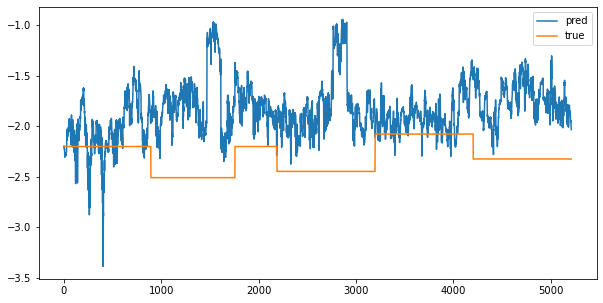

In [34]:
y_pred = gam_3.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(np.array(y_pred),label = "pred")
plt.plot(np.array(y_test),label = "true")
plt.legend()
plt.show()

In [36]:
# 정규화된 데이터를 역으로 변환합니다.
scaler = StandardScaler()
scaled_data = df1.iloc[:split_index, 1].values.reshape(-1, 1)  # 1D 데이터를 2D로 변환
scaler.fit(scaled_data)

# 이미 정규화된 y_pred 값을 역으로 변환합니다.
y_pred_origin = scaler.inverse_transform(y_pred)
y_test_origin = scaler.inverse_transform(y_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test_origin, y_pred_origin))

print("RMSE:", rmse)

RMSE: 1.1560442932806883


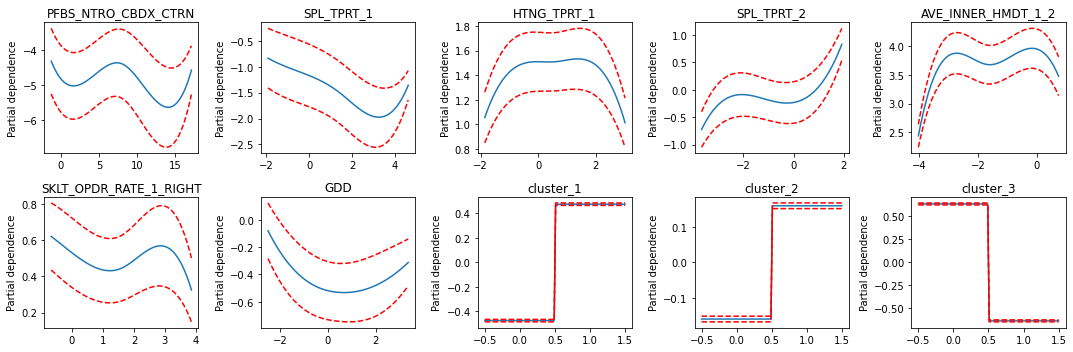

In [37]:
fig, axs = plt.subplots(2, 5, figsize=(15, 5))  # 3행 3열의 서브플롯 생성

# 각 서브플롯에 원하는 타이틀 설정
feature_names = ['PFBS_NTRO_CBDX_CTRN', 'SPL_TPRT_1', 'HTNG_TPRT_1', 'SPL_TPRT_2', 
                 'AVE_INNER_HMDT_1_2', 'SKLT_OPDR_RATE_1_RIGHT', 'GDD', 'cluster_1', 'cluster_2', 'cluster_3']

for i, ax in enumerate(axs.ravel()):  # 마지막 행의 2번째와 3번째 열은 제외
    XX = gam_3.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam_3.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam_3.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylabel('Partial dependence')
    ax.set_title(f'{feature_names[i]}')  # 원하는 타이틀로 설정

# 마지막 행의 2번째와 3번째 열 서브플롯은 비워둡니다.
# axs[2, 1].axis('off')
# axs[2, 2].axis('off')

plt.tight_layout()
plt.show()

In [38]:
# K-폴드 교차 검증을 위한 루프를 통해 모델 비교

kf = KFold(n_splits=10, shuffle=False)  # 10개 폴드를 사용하도록 설정 (shuffle=True로 설정)
mse_list = []

for i in range(1, 9):
    mse_scores = []
    for train_idx, valid_idx in kf.split(X_train):  # 정수 인덱스를 선택
        X_train_fold, X_valid_fold = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_train_fold, y_valid_fold = y_train.iloc[train_idx], y_train.iloc[valid_idx]
        
        lam_value = getattr(globals()[f'gam_{i}'], 'lam', [])[0][0]
        n_splines_value = getattr(globals()[f'gam_{i}'], 'n_splines', [])[0]
        
        # LinearGAM 모델 초기화
        gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + f(7) + f(8) + f(9),  n_splines=[n_splines_value] * 7 + [2] * 3, lam = lam_value)
    
        # 모델을 훈련 데이터에 적합
        gam.fit(X_train_fold, y_train_fold)
    
        # 모델로 예측
        y_pred = gam.predict(X_valid_fold)
    
        # 검증 세트에서 평가 (예: 평균 제곱 오차를 최소화하려고 함)
        mse = mean_squared_error(y_valid_fold, y_pred)
        mse_scores.append(mse)
        
    mse_list.append(np.mean(mse_scores))
    
print(mse_list)

[0.920148628541015, 1.1681604125685703, 1.115777308006565, 1.1445201611483657, 1.0233017190470346, 0.9213313183787024, 1.004151037772403, 1.1868354812296178]


결론 :  optuna로 얻은 하이퍼파라미터로 적합한 모델을 사용!